<a href="https://colab.research.google.com/github/amparo-r/ProyectoDataScience/blob/main/Curso_UTN_TP_Amparo_Re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Segmentación de clientes**

***Contexto:*** Una compañía de automóviles en una rápida evolución necesita de una segementación de clientes para poder comprender el comportamiento y preferencias de estos en  un nivel más profundo, así poder elaborar estrategias de marketing de manera más efectiva.

***Interes de la investigación:*** El objetivo principal de este proyecto es segmentar a los clientes en diferentes grupos en función de su comportamiento, el cual puede estar relacionado con factores como el género, la edad, el estado civil, entre otros.

***Glosario de columnas:***
* ID: Identificación única.
* Gender: Género del cliente.
* Ever_Married: Estado civil del cliente.
* Age: Edad del cliente.
* Graduated: Si el cliente es graduado o no.
* Profession: Profesión del cliente.
* Work_Experience: Años de experiencia laboral.
* Spending_Score: Puntuación de gasto del cliente.
* Family_Size: Número de miembros de la familia del cliente (incluido el cliente)
* Var_1: Categoría anónima para el cliente.
* Segmentation: (objetivo) Segmentación de clientes del cliente.



**Fuente del data set:** https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Train.csv

## Exploración del data set


In [ ]:
# Importación de librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Conexión al drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Conexión del dataset.
data = pd.read_excel('/content/drive/MyDrive/Trabajo final - Amparo Re/Train .xlsx')

In [ ]:
# Ver primeros registros del dataset.
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Acá ya puedo ver que hay valores NaN en la columna 'Work_Experience', que luego voy a eliminar o imputar.

In [ ]:
# Ver estructura del dataset.
data.shape

(8068, 11)

In [ ]:
# Ver tipos de datos.
data.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### Transformación del dataset

In [ ]:
# Ver columnas.
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

 Las columnas de 'Var_1' e 'ID', son columnas que no agregan valor significativo para el trabajo. La columna Var_1 esta compuesta por registros que no están descriptos, lo que los hace difícil de interpretarlos. La columna 'ID' es el número de identificación de cada cliente, algo que no aporta para la segmentación. Eliminar estas columnas es para simplicidad.

 La columna 'Segmentation' es en realidad el resultado de un ejercicio de segmentación anterior. Como es algo que busco hacer lo prefiero eliminar.

In [ ]:
# Eliminar columnas
df=data.drop (['Var_1','ID','Segmentation'], axis=1)
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 504.4+ KB


## Limpieza de datos

In [ ]:
# Ver datos nulos.
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

<Axes: >

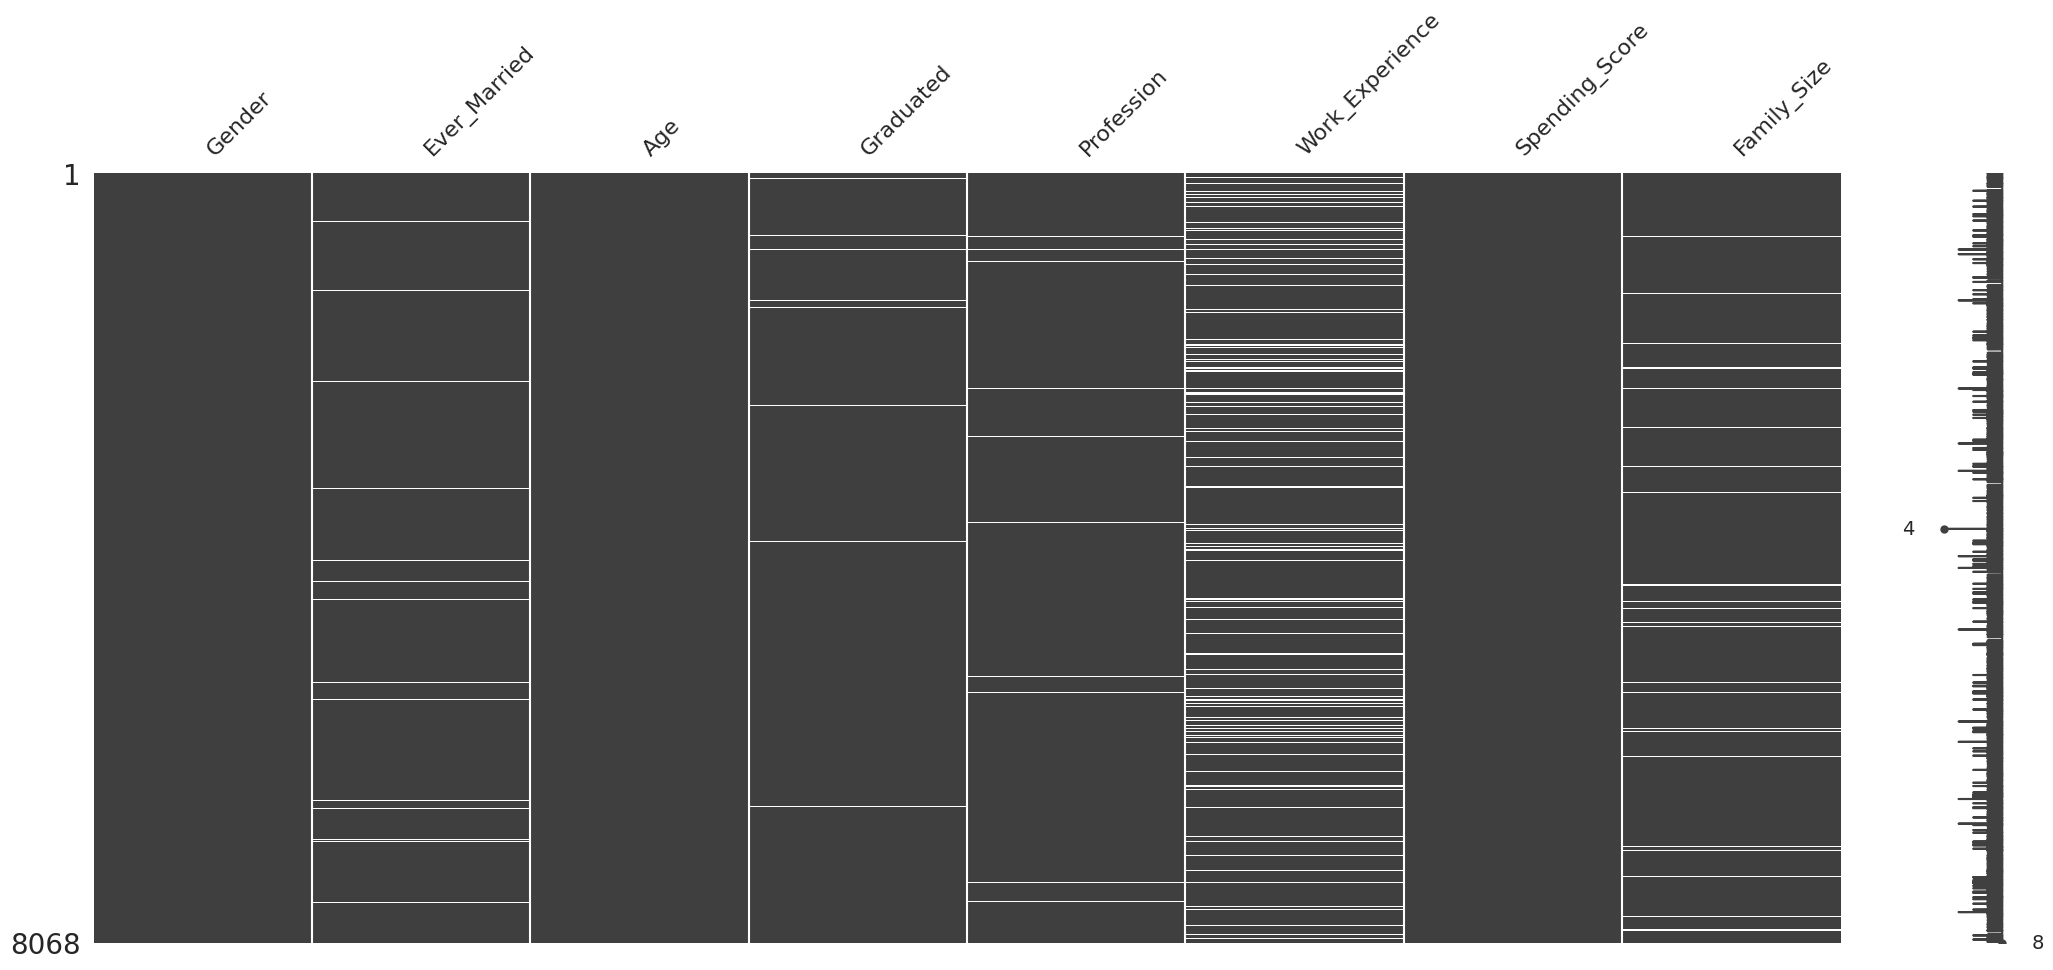

In [ ]:
# Distribución de nulos en cada columna.
import missingno as msno
msno.matrix(df)

Las lineas horizontales blancas indican los valores faltantes en cada columna, la columna con mayor cantidad de datos faltantes es 'Work_Experience'.

Se puede observar que las columnas 'Ever_Married', 'Graduated', 'Profession', 'Work_Experience' y 'Family_Size' tienen datos nulos, siendo todas estas de gran importancia para el trabajo decido imputar los datos.

Para las columnas categóricas, imputar con (.mode()) para dar con la moda, el valor con mayor frecuencia en la columna.
Para las columnas numéricas, imputar con el promedio de los valores de la columna.


In [ ]:
# Imputar valores categóricos:
df['Ever_Married'].fillna(df['Ever_Married'].mode()[0], inplace=True)
df['Graduated'].fillna(df['Graduated'].mode()[0], inplace=True)
df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)

# Imputar valores numéricos:
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)
df['Family_Size'].fillna(df['Family_Size'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

## Análisis descriptivo

In [ ]:
# Análisis descriptivo del dataset.
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.226972,1.499278
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,2.850123
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


**Columna 'Age':**
* La edad promedio es aproximadamente 43 años.
* La desviación estándar es aproximadamente 16.71
* La edad mínima es de 18 años.
* La edad máxima es de 89 años.
* Percentil 25 (25%): El 25% de las edades son iguales o menores a 30 años.
* Percentil 50 (50%): El 50% de las edades son iguales o menores a 40 años y el 50% esta por encima.
* Percentil 75 (75%): El 75% de las edades son iguales o menores a 53 años, y un 25% esta por encima.


**Columna 'Work_Experience':**
* La experiencia laboral promedio es de aproximadamente 2.6 años.
* La desviación estándar es aproximadamente 3.2
* Mínimo: 0 años de experiencia laboral.
* Máximo: 14 años de experiencia laboral..
* Percentil 25 (25%): El 25% de la experiencia laboral es iguales a 0 años.
* Percentil 50 (50%): El 50% de la experiencia laboral es igual o menor a 1 años y el 50% esta por encima.
* Percentil 75 (75%): El 75% de la experiencia laboral es igual o menor a 4 años, y un 25% esta por encima.


**Columna 'Family_Size':**
* El promedio es de aproximadamente 3 miembros por familia.
* La desviación estándar es aproximadamente 1.49
* Mínimo: 1 miembro en la familia.
* Máximo: 9 miembros en la familia.
* Percentil 25 (25%): El 25% es igual o menor a 2 miembros en la familia.
* Percentil 50 (50%): El 50% de es igual o menor a 3 miembros en la familia y el 50% esta por encima.
* Percentil 75 (75%): El 75% es igual o menor a 4 miembros en la familia, y un 25% esta por encima.

# Modelo

Elijo hacer un **clustering con el algoritmo K-Means** por ser una técnica de aprendizaje no supervisado que agrupa los datos similares en grupos. No voy a utilizar la regresión lineal ya que no quiero predecir valores.

Si bien se puede hacer un clustering con columnas categóricas es necesario transformalas a numéricas para que el algoritmos de clustering pueda trabajar con ellas de manera efectiva.

In [ ]:
# Transformación de columnas categóricas a numéricas usando One-Hot Encoding.
df = pd.get_dummies(df, drop_first=True)

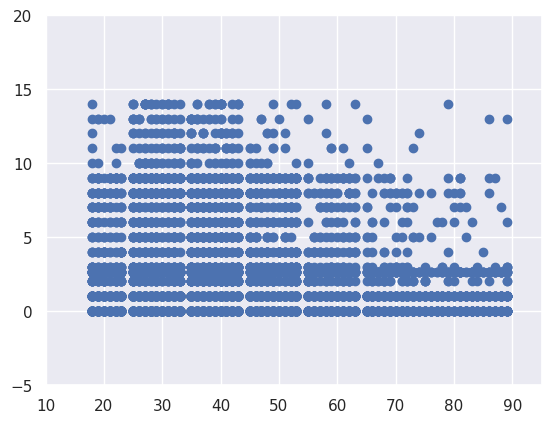

In [ ]:
# Ver distribución de  las caracteristicas y datos previo al modelado.
plt.scatter(df['Age'], df['Work_Experience'])
plt.xlim(10, 95)
plt.ylim(-5, 20)
plt.show()

Cada punto representa una muestra de los datos, en función a la edad y experiencia laboral. Se puede observar que los datos no tienen tanta disperción entre sí, más bien deben de tener valores muy similares.

Como no veo tanta disperción en los datos, considero que el número de clusters apropiado es de 3.

## Modelado

In [ ]:
# Número de clusters que busco.
kmeans =KMeans (n_clusters=3)

# Ajustar el modelo a los datos.
kmeans.fit (df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Este código al ejecutar me daba error, por esto: "Input X contains NaN.", lo cual no entendia porque pense que ya los habia imputado. Luego vi que tenia un error en el código de dummies, por (pd.get_dummies(df, drop_first=True)) ya que en vez de usar la variable 'df' usaba 'data', la variable en la cual no habia imputado valores, ni eliminado columnas. Corregí el error para poder seguir.

In [ ]:
identified_clusters = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_with_clusters = df.copy ()

# Agregar las etiquetas.
df_with_clusters['Cluster'] = identified_clusters
print(df_with_clusters.head())

   Age  Work_Experience  Family_Size  Gender_Male  Ever_Married_Yes  \
0   22         1.000000          4.0            1                 0   
1   38         2.641663          3.0            0                 1   
2   67         1.000000          1.0            0                 1   
3   67         0.000000          2.0            1                 1   
4   40         2.641663          6.0            0                 1   

   Graduated_Yes  Profession_Doctor  Profession_Engineer  \
0              0                  0                    0   
1              1                  0                    1   
2              1                  0                    1   
3              1                  0                    0   
4              1                  0                    0   

   Profession_Entertainment  Profession_Executive  Profession_Healthcare  \
0                         0                     0                      1   
1                         0                     0           

## Resultado del modelo

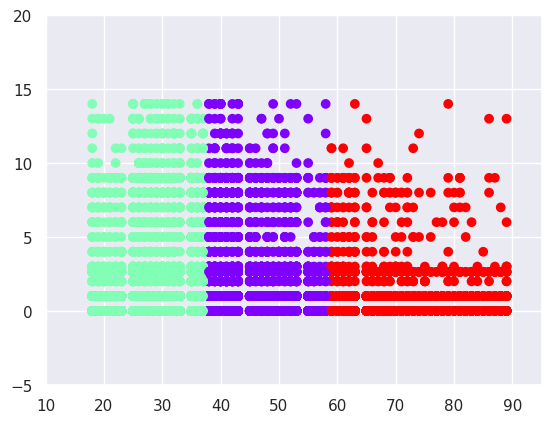

In [ ]:
# Graficar
plt.scatter(df_with_clusters['Age'], df_with_clusters['Work_Experience'], c=df_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(10, 95)
plt.ylim(-5, 20)
plt.show()

Este gráfico de dispersión muestra la agrupación de los diferentes clusters, permitiendo ver su disperción en cuanto a la edad y experiencia laboral. Como comenté previamente, no se ve una gran disperción en cuanto a los datos.

In [ ]:
# Calcular el promedio de cada valor por cada cluster.
cluster_means = df_with_clusters.groupby('Cluster').mean()

# Analizar cada cluster.
for cluster in range(3):
    print(f"Cluster {cluster}:\n")
    print(cluster_means.loc[cluster])



Cluster 0:

Age                         46.344434
Work_Experience              2.661661
Family_Size                  2.715323
Gender_Male                  0.536315
Ever_Married_Yes             0.755788
Graduated_Yes                0.777355
Profession_Doctor            0.078972
Profession_Engineer          0.106565
Profession_Entertainment     0.134158
Profession_Executive         0.095782
Profession_Healthcare        0.031082
Profession_Homemaker         0.027276
Profession_Lawyer            0.009515
Profession_Marketing         0.028861
Spending_Score_High          0.141770
Spending_Score_Low           0.476689
Name: 0, dtype: float64
Cluster 1:

Age                         28.488777
Work_Experience              3.131524
Family_Size                  3.234250
Gender_Male                  0.535440
Ever_Married_Yes             0.285292
Graduated_Yes                0.462788
Profession_Doctor            0.116361
Profession_Engineer          0.083579
Profession_Entertainment     0.110750
Pr

*Análisis de cada cluster:*

**Cluster 0:**
* La edad promedio de clientes en este cluster es de 46 años.
* El promedio de experiencia laboral es de 2.6 años.
* El promedio es de 2.7 miembros por familia.
* La mayoria son de género masculino, están graduados y casados.
* La profesión de la mayoria es Entertainment, seguida por Engineer.
* El gasto de la mayoria de clientes es bajo.




**Cluster 1:**
* La edad promedio de clientes en este cluster es de 28 años.
* El promedio de experiencia laboral es de 3.1 años.
* El promedio es de 3.2 miembros por familia.
* La mayoria son de género masculino, están graduados y casados.
* La profesión de la mayoria es Healthcare, seguida por Doctor y Entertainment.
* El gasto de la mayoria de clientes es bajo.

**Cluster 2:**
* La edad promedio de clientes en este cluster es de 70 años.
* El promedio de experiencia laboral es de 1.5 años.
* El promedio es de 2.2 miembros por familia.
* La mayoria son de género masculino, están graduados y casados.
* La profesión de la mayoria es Lawyer, seguida por Executive.
* El gasto de la mayoria de clientes es bajo.


## Optimización de modelo

In [ ]:
# Preprocesar los datos escalando las características.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


**Método del codo**

In [ ]:
# Determinar el número óptimo de clústeres.
inertia_values = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

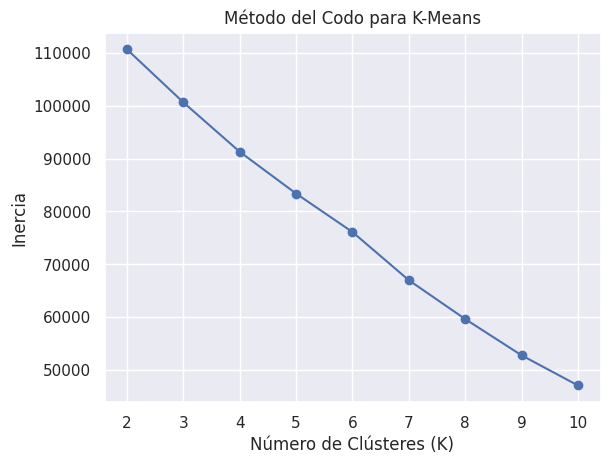

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número óptimo de clústeres: 3
Inercia óptima: 100622.16978925909


In [ ]:
# Graficar el método del codo.
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')
plt.show()

# Entrenar el modelo con el número óptimo de clústeres elegido.
k_optimo = 3
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42)
kmeans_optimo.fit(X_scaled)

labels_optimo = kmeans_optimo.labels_

# Evaluar el rendimiento del modelo.
inercia_optimo = kmeans_optimo.inertia_
silhouette_optimo = silhouette_score(X_scaled, labels_optimo)

print(f"Número óptimo de clústeres: {k_optimo}")
print(f"Inercia óptima: {inercia_optimo}")


Viendo el gráfico no puedo notar el punto en el que la curva de la inercia comienza a aplanarse. Por lo que depende del resultado de la inercia óptima el cual da que el número óptimo es de 3 clusters.
Para confirmar vemos el método de la silueta.

**Método de la Silueta**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

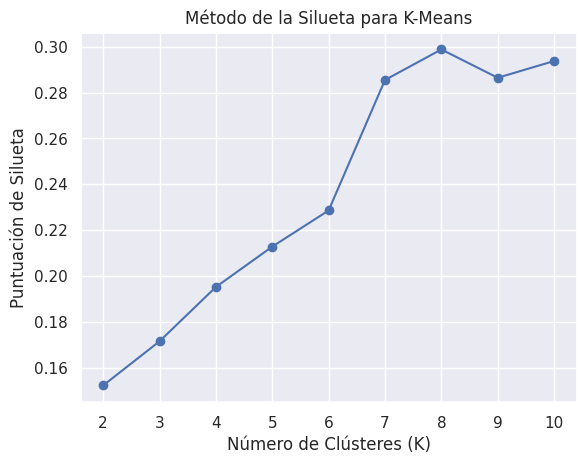

Número óptimo de clústeres: 3
Puntuación de Silueta óptima: 0.17155878212572898


In [ ]:
# Determinar el número óptimo de clústeres.
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Graficar el método de la silueta.
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta para K-Means')
plt.show()


print(f"Número óptimo de clústeres: {k_optimo}")
print(f"Puntuación de Silueta óptima: {silhouette_optimo}")